<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/25_Encoder_Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Encoder Decoder
The Encoder-Decoder architecture is a framework used in sequence-to-sequence (Seq2Seq) models for tasks such as machine translation, text summarization, and speech recognition. It consists of two main components: an encoder and a decoder.


We will take machine translation as an example to understand encoder decoder architecture. Lets say input sentence is in english and we have to translate it into urdu. Following is the high level diagram to understand this:
![encoder](https://vitalflux.com/wp-content/uploads/2023/03/encoder-decoder-architecture-300x165.png)

We given our input sentence as tokens to encoder block. It will understand whole context of sentence and give summary as an output. This output is the vector which we called context vector. Decoder will take context vector as an input,, understand it and generate sentence in urdu.


Both encoder and decoder have LSTM used in them. We can also use GRU in decoder. And LSTM will unfold at each time step. Final hidden cell state and current cell state from Encoder LSTM Block will act as input for decoder. Output at each time step in encoder is ignored.

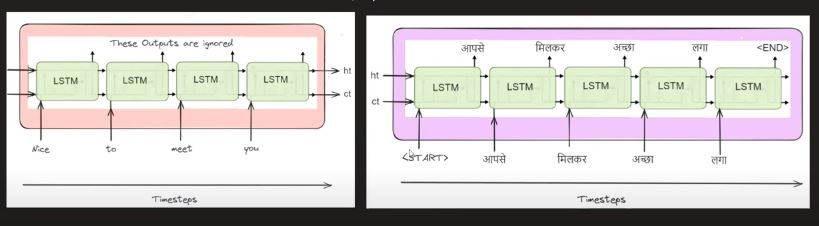

# Training using backpropagation

Assume we are working with following dataset:

| English | Urdu |
|----------|----------|
| Come in | Andr a jao |
| Be Happy | Khush raho |

* **Step 01**
Tokenization

| English | Urdu |
|----------|----------|
| [Come, in]| [Andr, a, jao] |
| [Be, Happy] | [Khush, raho] |

* **Step 02**
One hot encoding

| English | Urdu |
|----------|----------|
| Come → [1,0,0,0]| start → [1,0,0,0,0,0,0] |
| in → [0,1,0,0] | andr  → [0,1,0,0,0,0,0] |
| be → [0,0,1,0] |  a  → [0,0,1,0,0,0,0] |
| happy → [0,0,0,1]  | jao → [0,0,0,1,0,0,0]  |
||khush → [0,0,0,0,1,0,0] |
||raho → [0,0,0,0,0,1,0] |
||end → [0,0,0,0,0,0,1] |


* **Step 03** Trainig

So for encoder, we will have two lstms, each have one timestep as input from row 1. And at the end will give some output(we will ignore output). Context vector is passed to decoder (c_t and h_t) and decoder will start from <\start> and lstm at this timestep will give some output. and we have a softmx layer on top of it. Softmax layer have exactly same number of neurons as number of words/tokens in decoder part(urdu vocabulary). It give some vector, we will compare it with actual output at that timestep. Output of this timestep should be the input of next timestep but in training we do not do this. We give correct input to next timestep(incase model predict wring word). This process is called **Teacher Forcing** and it help model to converge faster.

* **Step 04** Calculate Loss

Lets assume following is the output:

|| y_true | y_pred |
|--|----------|----------|
|t=1 |[0,1,0,0,0,0,0]|  [0,0.2,0.6,0.4,0.7,0.2,0.3] |
|t=2| [0,0,1,0,0,0,0] | [0.3,0.4,0.1,0.2,0.2,0.9,0.6] |
|t=3 |[0,0,0,1,0,0,0]|   [0.6,0.4,0.3,0.5,0.9,0.2,0.1] |
|t=4| [0,0,0,0,0,0,1] | [0.5,0.1,0.2,0.3,0.4,0.3,0.9] |

$$ \text{Categorical Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(p_{ij}) $$
$$ L_t1 = -1*log(0.2) = 0.69$$
$$ L_t2 = -1*log(0.1) = 1$$
$$ L_t3 = -1*log(0.5) = 0.3$$
$$ L_t4 = -1*log(0.9) = 0.04$$


Total loss = 2.03

Average loss = 0.5

* **Step 05** Calculate Backpropagation
* **Step 06** Update weights

Again we will hop on second row & will compute loss and update weights

# Testing
We will take unseen data, encoder will be the same. COntext vector is given to decoder now it will predict first token (Here we don't have true values so this output will be the input for next timestep). For each step it will give output and at the end we will see whether our model predicted right output or not.

# Improvement 01: Embeddings

Embeddings are basically low level representation of something. Why we really need embeddings?

When we are working with real life problem, data will be in lakhs so if we stick to one hot encoding it will give lac dimensional vector for each token. Which is obviously not a good thing because it will be sparse vector and secondly this vector does not tell us about real work/token.

We will use embedding for both encoder and decoder. We can use pretrained embedding like word2vec/glove or we can train our own embeddings


# Improvement 02: Deep LSTM



why
* Can handle long term dependencies more effectively
* Can understand hierarchy in data
* Higher parameters increase model capacity (better generalization, can capture variations in data)

# Improvement 03: Reverse the input

work only for few language where initial words has more context.

# Reference

* https://towardsdatascience.com/how-to-implement-seq2seq-lstm-model-in-keras-shortcutnlp-6f355f3e5639
* https://machinelearningmastery.com/define-encoder-decoder-sequence-sequence-model-neural-machine-translation-keras/
* https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
